In [1]:
import os
#os.environ['PROJ_LIB'] = r'C:\Users\regin\Anaconda3\pkgs\proj4-5.2.0-ha925a31_1\Library\share'
os.environ['PROJ_LIB'] = r'C:\Users\Work\Anaconda3\pkgs\proj4-5.2.0-ha925a31_1\Library\share'
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import LinearSegmentedColormap
import matplotlib as mpl

In [2]:
dir = '/Users/Work/Desktop/Regine_project/data/' #change dir
method = 'CCR' #change method
raw_file = dir + 'crps_fcst_raw_new.nc'
raw_data = Dataset(raw_file, mode='r')

cal_file = dir + 'crps_fcst_cal_' + method + '_new.nc'
cal_data = Dataset(cal_file, mode='r')

In [3]:
lons = raw_data.variables['lon'][:]
lats = raw_data.variables['lat'][:]
raw_tass = raw_data.variables['calculate_crps_fcst_raw_new'][:]
cal_tass = cal_data.variables['calculate_crps_fcst_cal_'+method][:]
raw_data.close()
cal_data.close()
print(raw_tass.shape)
print(cal_tass.shape)
#Compute skill score
skill_score = np.empty([24, len(lats),len(lons)]) # 1993 to 2016: 24 years
print(skill_score.shape)
skill_score = np.mean(1-(cal_tass/raw_tass), axis=0) #average year-axis
max = np.max(skill_score)
min = np.min(skill_score)
ave = np.mean(skill_score)
print(skill_score.shape)

(24, 31, 51)
(24, 31, 51)
(24, 31, 51)
(31, 51)


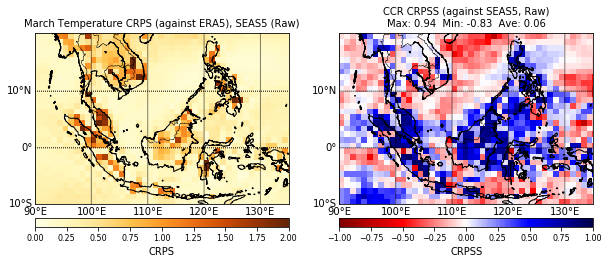

In [4]:
# Get some parameters for the Mercator Projection
lon_0 = lons.mean()
lat_0 = lats.mean()

fig = plt.figure(figsize=(10,10))

#first plot
ax = fig.add_subplot(1,2,1)

m = Basemap(llcrnrlon=90, llcrnrlat=-10, 
            urcrnrlon=135,urcrnrlat=20,
            projection='merc', resolution = 'i',
            lon_0=lon_0, lat_0=lat_0)

# Because our lon and lat variables are 1D, use meshgrid to create 2D arrays
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)

# Set the color scale
label = "CRPS"

# Plot Data
cs = m.pcolormesh(xi,yi,np.squeeze(np.mean(raw_tass,axis=0)),cmap=plt.cm.get_cmap('YlOrBr',100))

# Add Grid Lines
m.drawparallels(np.arange(-10., 30., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(90., 150., 10.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="8%")
plt.clim(0,2)
cbar.set_label(label,fontsize=10)
cbar.ax.tick_params(labelsize=8)

# Add Suptitle and Title
plt.title('March Temperature CRPS (against ERA5), SEAS5 (Raw)',fontsize=10)

# Second plot
ax = fig.add_subplot(1,2,2)

m = Basemap(llcrnrlon=90, llcrnrlat=-10, 
            urcrnrlon=135,urcrnrlat=20,
            projection='merc', resolution = 'i',
            lon_0=lon_0, lat_0=lat_0)

# Because our lon and lat variables are 1D, use meshgrid to create 2D arrays
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)

# Set the label
label = "CRPSS"

# Plot Data
cs = m.pcolormesh(xi,yi,np.squeeze(skill_score),cmap=plt.cm.get_cmap('seismic_r',100))

# Add Grid Lines
m.drawparallels(np.arange(-10., 30., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(90., 150., 10.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="8%")
plt.clim(-1,1)
cbar.set_label(label,fontsize=10)
cbar.ax.tick_params(labelsize=8)

# Add Suptitle and Title 
plt.title(method + ' CRPSS (against SEAS5, Raw)\n' + 'Max: ' + str("%.2f" % max) + '  Min: ' + str("%.2f" % min) + '  Ave: ' + str("%.2f" % ave),fontsize=10)

#plt.tight_layout()
plt.show()